In [1]:
import cartopy.crs as ccrs
import cosima_cookbook as cc
import cartopy.crs as ccrs
import cosima_cookbook as cc
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cmocean as cm
from dask.distributed import Client
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

# Avoid the Runtime errors in true_divide encountered when trying to divide by zero
import warnings
warnings.filterwarnings('ignore', category = RuntimeWarning)

# matplotlib stuff:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['lines.linewidth'] = 2.0

In [2]:
from dask.distributed import Client
client = Client()
client

Client Scheduler: tcp://127.0.0.1:43483 Dashboard: /proxy/8787/status,Cluster Workers: 4 Cores: 8 Memory: 34.36 GB


In [3]:
db = '/scratch/x77/db6174/access-om2/archive/databases/cc_database_nostress_hourly.db'
session = cc.database.create_session(db)

In [4]:
expt = ['025deg_jra55_ryf_nostress_cont_hourly','025deg_jra55_ryf_nostress_hourly','025deg_jra55_ryf_nostress_naive']

In [5]:
#dir_list = ['/scratch/x77/db6174/access-om2/archive/025deg_jra55_ryf_nostress_cont_hourly',
#           '/scratch/x77/db6174/access-om2/archive/025deg_jra55_ryf_nostress_hourly',
#           '/scratch/x77/db6174/access-om2/archive/025deg_jra55_ryf_nostress_naive']
#cc.database.build_index(dir_list, session, update=True)

  2%|▏         | 2/108 [00:00<00:09, 11.63it/s]

Indexing experiment: 025deg_jra55_ryf_nostress_cont_hourly


  4%|▎         | 4/108 [00:00<00:02, 37.57it/s]

Indexing experiment: 025deg_jra55_ryf_nostress_hourly


  1%|          | 1/108 [00:00<00:18,  5.90it/s]

Indexing experiment: 025deg_jra55_ryf_nostress_naive


100%|██████████| 108/108 [00:18<00:00,  5.79it/s]


324

In [5]:
temp_sfc_con = cc.querying.getvar(expt = expt[0], session = session, variable = 'surface_temp', frequency = '1 hourly')
salt_sfc_con = cc.querying.getvar(expt = expt[0], session = session, variable = 'surface_salt', frequency = '1 hourly')
pme_river_con = cc.querying.getvar(expt = expt[0], session = session, variable = 'pme_river', frequency = '1 hourly')
hblt_con = cc.querying.getvar(expt = expt[0], session = session, variable = 'mld', frequency = '1 hourly')
heat_sfc_con = cc.querying.getvar(expt = expt[0], session = session, variable = 'net_sfc_heating', frequency = '1 hourly')

In [6]:
temp_sfc_buo = cc.querying.getvar(expt = expt[1], session = session, variable = 'surface_temp', frequency = '1 hourly')
salt_sfc_buo = cc.querying.getvar(expt = expt[1], session = session, variable = 'surface_salt', frequency = '1 hourly')
pme_river_buo = cc.querying.getvar(expt = expt[1], session = session, variable = 'pme_river', frequency = '1 hourly')
hblt_buo = cc.querying.getvar(expt = expt[1], session = session, variable = 'mld', frequency = '1 hourly')
heat_sfc_buo = cc.querying.getvar(expt = expt[1], session = session, variable = 'net_sfc_heating', frequency = '1 hourly')

In [7]:
temp_sfc_naive = cc.querying.getvar(expt = expt[2], session = session, variable = 'surface_temp', frequency = '1 hourly')
salt_sfc_naive = cc.querying.getvar(expt = expt[2], session = session, variable = 'surface_salt', frequency = '1 hourly')
pme_river_naive = cc.querying.getvar(expt = expt[2], session = session, variable = 'pme_river', frequency = '1 hourly')
hblt_naive = cc.querying.getvar(expt = expt[2], session = session, variable = 'mld', frequency = '1 hourly')
heat_sfc_naive = cc.querying.getvar(expt = expt[2], session = session, variable = 'net_sfc_heating', frequency = '1 hourly')

Text(0.5, 1.0, 'Surface heat (Control - naive run)')

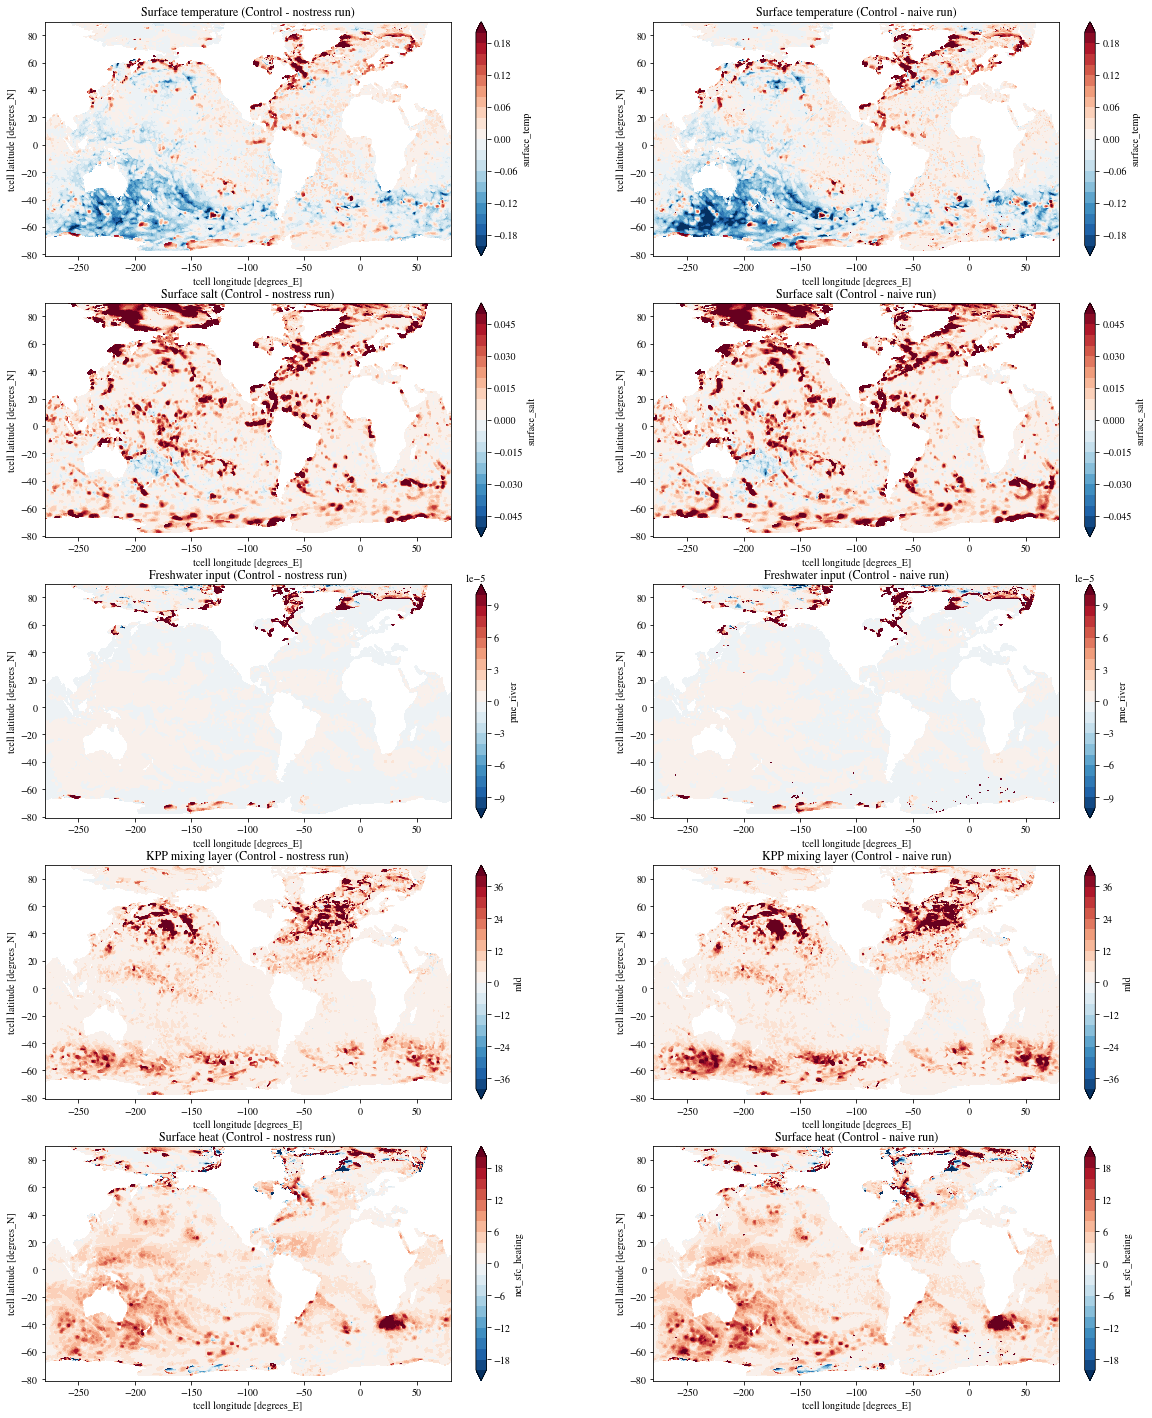

In [13]:
fig, axes = plt.subplots(nrows=5,ncols=2,figsize=(20,25))

(temp_sfc_con - temp_sfc_buo).mean('time').plot.contourf(ax = axes[0][0],levels = np.linspace(-0.2,0.2,21))
axes[0][0].set_title('Surface temperature (Control - nostress run)')

(temp_sfc_con - temp_sfc_naive).mean('time').plot.contourf(ax = axes[0][1],levels = np.linspace(-0.2,0.2,21))
axes[0][1].set_title('Surface temperature (Control - naive run)')

(salt_sfc_con - salt_sfc_buo).mean('time').plot.contourf(ax = axes[1][0],levels = np.linspace(-0.05,0.05,21))
axes[1][0].set_title('Surface salt (Control - nostress run)')

(salt_sfc_con - salt_sfc_naive).mean('time').plot.contourf(ax = axes[1][1],levels = np.linspace(-0.05,0.05,21))
axes[1][1].set_title('Surface salt (Control - naive run)')

(pme_river_con - pme_river_buo).mean('time').plot.contourf(ax = axes[2][0],levels = np.linspace(-1e-4,1e-4,21))
axes[2][0].set_title('Freshwater input (Control - nostress run)')

(pme_river_con - pme_river_naive).mean('time').plot.contourf(ax = axes[2][1],levels = np.linspace(-1e-4,1e-4,21))
axes[2][1].set_title('Freshwater input (Control - naive run)')

(hblt_con - hblt_buo).mean('time').plot.contourf(ax = axes[3][0],levels = np.linspace(-40,40,21))
axes[3][0].set_title('KPP mixing layer (Control - nostress run)')

(hblt_con - hblt_naive).mean('time').plot.contourf(ax = axes[3][1],levels = np.linspace(-40,40,21))
axes[3][1].set_title('KPP mixing layer (Control - naive run)')

(heat_sfc_con - heat_sfc_buo).mean('time').plot.contourf(ax = axes[4][0],levels = np.linspace(-20,20,21))
axes[4][0].set_title('Surface heat (Control - nostress run)')

(heat_sfc_con - heat_sfc_naive).mean('time').plot.contourf(ax = axes[4][1],levels = np.linspace(-20,20,21))
axes[4][1].set_title('Surface heat (Control - naive run)')

## KPP Diffusivity

In [28]:
cbt_diff_con = cc.querying.getvar(expt = expt[0], session = session, variable = 'diff_cbt_t', frequency = '1 hourly')
cbt_diff_buo = cc.querying.getvar(expt = expt[1], session = session, variable = 'diff_cbt_t', frequency = '1 hourly')
cbt_diff_naive = cc.querying.getvar(expt = expt[2], session = session, variable = 'diff_cbt_t', frequency = '1 hourly')

distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker


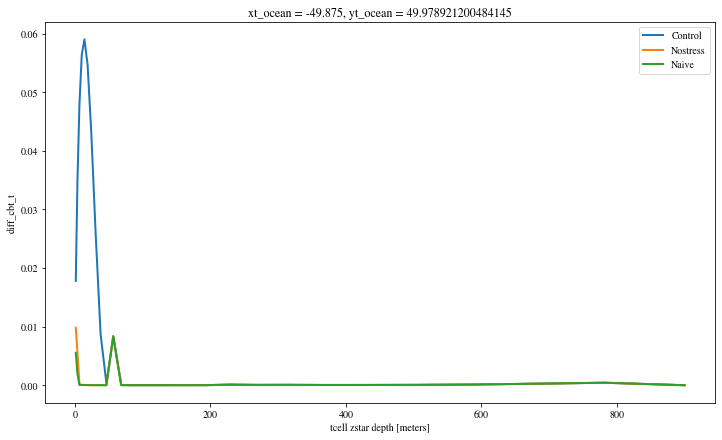

In [33]:
plt.figure(figsize = (12,7))
cbt_diff_con.sel(xt_ocean = -50, method = 'nearest').sel(yt_ocean = 50, method = 'nearest').mean('time').plot(label = 'Control')
cbt_diff_buo.sel(xt_ocean = -50, method = 'nearest').sel(yt_ocean = 50, method = 'nearest').mean('time').plot(label = 'Nostress')
cbt_diff_naive.sel(xt_ocean = -50, method = 'nearest').sel(yt_ocean = 50, method = 'nearest').mean('time').plot(label = 'Naive')
plt.legend()

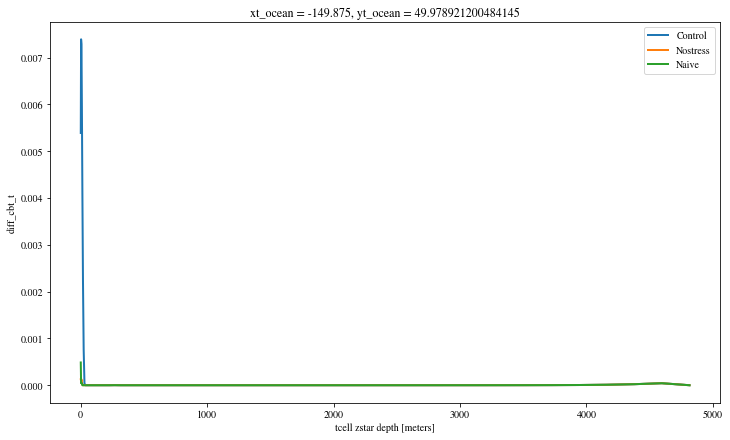

In [34]:
plt.figure(figsize = (12,7))
cbt_diff_con.sel(xt_ocean = -150, method = 'nearest').sel(yt_ocean = 50, method = 'nearest').mean('time').plot(label = 'Control')
cbt_diff_buo.sel(xt_ocean = -150, method = 'nearest').sel(yt_ocean = 50, method = 'nearest').mean('time').plot(label = 'Nostress')
cbt_diff_naive.sel(xt_ocean = -150, method = 'nearest').sel(yt_ocean = 50, method = 'nearest').mean('time').plot(label = 'Naive')
plt.legend()

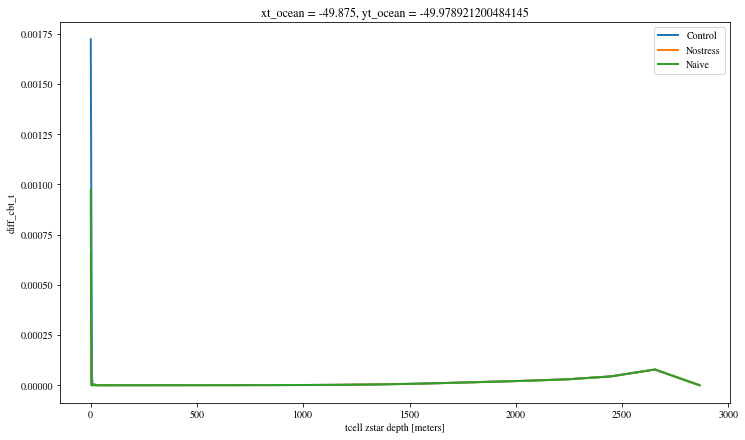

In [35]:
plt.figure(figsize = (12,7))
cbt_diff_con.sel(xt_ocean = -50, method = 'nearest').sel(yt_ocean = -50, method = 'nearest').mean('time').plot(label = 'Control')
cbt_diff_buo.sel(xt_ocean = -50, method = 'nearest').sel(yt_ocean = -50, method = 'nearest').mean('time').plot(label = 'Nostress')
cbt_diff_naive.sel(xt_ocean = -50, method = 'nearest').sel(yt_ocean = -50, method = 'nearest').mean('time').plot(label = 'Naive')
plt.legend()

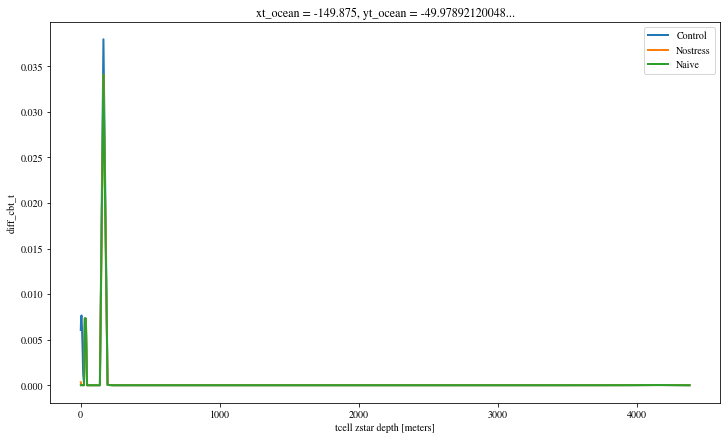

In [36]:
plt.figure(figsize = (12,7))
cbt_diff_con.sel(xt_ocean = -150, method = 'nearest').sel(yt_ocean = -50, method = 'nearest').mean('time').plot(label = 'Control')
cbt_diff_buo.sel(xt_ocean = -150, method = 'nearest').sel(yt_ocean = -50, method = 'nearest').mean('time').plot(label = 'Nostress')
cbt_diff_naive.sel(xt_ocean = -150, method = 'nearest').sel(yt_ocean = -50, method = 'nearest').mean('time').plot(label = 'Naive')
plt.legend()

In [ ]:
plt.figure(figsize = (12,6))
plt.yscale('log')
(cbt_diff_con - cbt_diff_buo).sel(xt_ocean = -150, method = 'nearest').sel(time = slice('1900-01-01 05:00:00','1900-01-01 06:00:00')).mean('time').plot.contourf(levels = np.linspace(-4e-2,4e-2,21))
plt.gca().invert_yaxis()
plt.show()

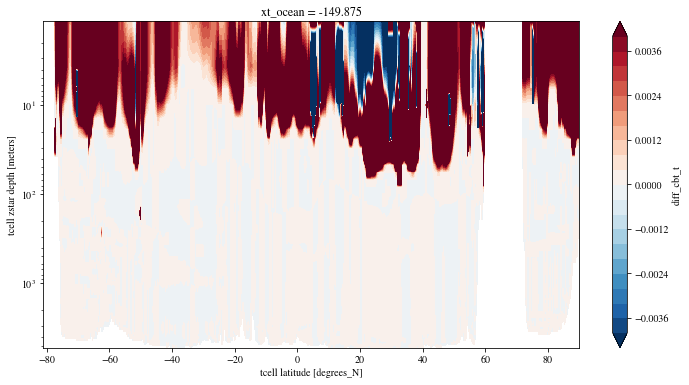

In [74]:
plt.figure(figsize = (12,6))
plt.yscale('log')
(cbt_diff_con - cbt_diff_naive).sel(xt_ocean = -150, method = 'nearest').sel(time = slice('1900-01-01 05:00:00','1900-01-01 06:00:00')).mean('time').plot.contourf(levels = np.linspace(-4e-3,4e-3,21))
plt.gca().invert_yaxis()
plt.show()